<a href="https://colab.research.google.com/github/SaiPranaviJeedigunta/analysing_information_revelation_in_popular_books/blob/main/Analyzing_the_Role_of_Information_Revelation_in_Book_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Role of Information Revelation in Book Popularity

## Objective
The goal of this analysis is to understand the impact of narrative revelation on the popularity of English-language fiction books. We will use Kullback-Liebler divergence (KLD) scores to measure information revelation and relate these scores to book popularity, measured by download counts from Project Gutenberg.


# Loading Data

In [1]:
import pandas as pd

# URLs of the raw files on GitHub
metadata_url = 'https://raw.githubusercontent.com/SaiPranaviJeedigunta/analysing_information_revelation_in_popular_books/main/data/SPGC-metadata-2018-07-18.csv'
kldscores_url = 'https://raw.githubusercontent.com/SaiPranaviJeedigunta/analysing_information_revelation_in_popular_books/main/data/KLDscores.csv'
extra_controls_url = 'https://raw.githubusercontent.com/SaiPranaviJeedigunta/analysing_information_revelation_in_popular_books/main/data/extra_controls.csv'

# Load the datasets into Pandas DataFrames
metadata = pd.read_csv(metadata_url)
kld_scores = pd.read_csv(kldscores_url)
extra_controls = pd.read_csv(extra_controls_url)

# Display the first few rows of each DataFrame to confirm successful loading
print(metadata.head())
print(kld_scores.head())
print(extra_controls.head())


    id                                              title  \
0  PG0                                                NaN   
1  PG1  The Declaration of Independence of the United ...   
2  PG2  The United States Bill of Rights: The Ten Orig...   
3  PG3                John F. Kennedy's Inaugural Address   
4  PG4  Lincoln's Gettysburg Address: Given November 1...   

                               author  authoryearofbirth  authoryearofdeath  \
0                                 NaN                NaN                NaN   
1                   Jefferson, Thomas             1743.0             1826.0   
2                       United States                NaN                NaN   
3  Kennedy, John F. (John Fitzgerald)             1917.0             1963.0   
4                    Lincoln, Abraham             1809.0             1865.0   

  language  downloads                                           subjects  type  
0      NaN        NaN                                              set()  Tex

# Data Cleaning

In [3]:
# Check for missing values
print(metadata.isnull().sum())
print(kld_scores.isnull().sum())
print(extra_controls.isnull().sum())

id                       0
title                   71
author                2262
authoryearofbirth    14767
authoryearofdeath    15863
language                 2
downloads                2
subjects                 0
type                     0
dtype: int64
filename      0
kld_values    0
dtype: int64
id                         0
subj2_war                  0
subj2_adventure            0
subj2_comedy               0
subj2_biography            0
subj2_romance              0
subj2_drama                0
subj2_fantasy              0
subj2_family               0
subj2_sciencefiction       0
subj2_action               0
subj2_thriller             0
subj2_western              0
subj2_horror               0
subj2_mystery              0
subj2_crime                0
subj2_history              0
subj2_periodicals          0
subj2_others               0
speed                   2688
sentiment_avg           2688
sentiment_vol           2688
wordcount               2688
dtype: int64


In [4]:
# Impute missing values in 'language' column with the most frequent language
most_common_language = metadata['language'].mode()[0]
metadata['language'].fillna(most_common_language, inplace=True)

# Optionally, drop rows with missing 'title' values if they cannot be imputed
metadata.dropna(subset=['title'], inplace=True)

# Impute 'author' with mode (most frequent author)
metadata['author'].fillna(metadata['author'].mode()[0], inplace=True)

# Replace missing values in numeric columns with median

metadata['authoryearofbirth'].fillna(metadata['authoryearofbirth'].median(), inplace=True)
metadata['authoryearofdeath'].fillna(metadata['authoryearofdeath'].median(), inplace=True)
metadata['downloads'].fillna(metadata['downloads'].median(), inplace=True)

In [5]:
# Identify numeric columns
numeric_cols = extra_controls.select_dtypes(include='number').columns

# Impute missing values with median for numeric columns only
extra_controls[numeric_cols] = extra_controls[numeric_cols].fillna(extra_controls[numeric_cols].median())

# Check for missing kld_values in original DataFrame
missing_values_count = kld_scores['kld_values'].isnull().sum()

In [6]:
# Check again for missing values after imputation
print("Missing Values in Metadata After Imputation:")
print(metadata.isnull().sum())

print("\nMissing Values in Extra Controls After Imputation:")
print(extra_controls.isnull().sum())

print(f"Number of missing kld_values in original DataFrame: {missing_values_count}")
print(kld_scores.isnull().sum())

Missing Values in Metadata After Imputation:
id                   0
title                0
author               0
authoryearofbirth    0
authoryearofdeath    0
language             0
downloads            0
subjects             0
type                 0
dtype: int64

Missing Values in Extra Controls After Imputation:
id                      0
subj2_war               0
subj2_adventure         0
subj2_comedy            0
subj2_biography         0
subj2_romance           0
subj2_drama             0
subj2_fantasy           0
subj2_family            0
subj2_sciencefiction    0
subj2_action            0
subj2_thriller          0
subj2_western           0
subj2_horror            0
subj2_mystery           0
subj2_crime             0
subj2_history           0
subj2_periodicals       0
subj2_others            0
speed                   0
sentiment_avg           0
sentiment_vol           0
wordcount               0
dtype: int64
Number of missing kld_values in original DataFrame: 0
filename      0
kl

In [7]:
import pandas as pd
import numpy as np

# Convert 'downloads' column to numeric
metadata['downloads'] = pd.to_numeric(metadata['downloads'], errors='coerce')

# Filter out rows with non-numeric values in 'downloads' column
metadata = metadata[~metadata['downloads'].isnull()]

# Add log transformation if needed
metadata['log_downloads'] = np.log1p(metadata['downloads'])

# Verify the cleaned metadata
print(metadata.info())


<class 'pandas.core.frame.DataFrame'>
Index: 57642 entries, 1 to 57712
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57642 non-null  object 
 1   title              57642 non-null  object 
 2   author             57642 non-null  object 
 3   authoryearofbirth  57642 non-null  float64
 4   authoryearofdeath  57642 non-null  float64
 5   language           57642 non-null  object 
 6   downloads          57642 non-null  float64
 7   subjects           57642 non-null  object 
 8   type               57642 non-null  object 
 9   log_downloads      57642 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.8+ MB
None



1. **Handling Missing Values in metadata:**
   - **Language Column:** Missing values in the 'language' column are filled with the most frequent language found in the dataset (mode() function).
   - **Title Column:** If the 'title' column has missing values that cannot be imputed (using dropna() function with subset=['title']), those rows are dropped.
   - **Author Column:** Missing values in the 'author' column are replaced with the most frequent author name (mode() function).
   - **Numeric Columns:** Missing values in numeric columns ('authoryearofbirth', 'authoryearofdeath', 'downloads') are filled with the median value of each respective column (fillna() function with median()).

2. **Handling Missing Values in extra_controls:**
   - **Identifying Numeric Columns:** Only numeric columns are selected for imputation using select_dtypes(include='number')`.
   - **Imputation:** Missing values in numeric columns of extra_controls are filled with the median value of each respective column (fillna() function with median()).

These steps ensure that the DataFrames are prepared for further analysis or processing by handling missing data appropriately, either by filling them with suitable values (like median or mode) or dropping rows if necessary.

# Build Book-Level Measures of KLD


## Data Preparation and Feature Engineering

### Calculating Book-Level KLD Measures

We computed comprehensive book-level measures of Kullback-Leibler Divergence (KLD) to understand narrative information revelation:

- **Mean KLD:** Represents the average KLD score across the narrative, indicating the typical level of information revealed.
- **Variance KLD:** Measures the variability in KLD scores, showing how consistently or sporadically information is revealed.
- **Slope KLD:** Indicates the trend of information revelation over the narrative, derived from linear regression of KLD scores.
- **Median KLD:** Provides the middle value of KLD scores, offering insight into the central tendency of information revelation.
- **Maximum KLD:** Identifies the highest KLD score reached, highlighting peak points of information intensity.
- **Minimum KLD:** Specifies the lowest KLD score observed, marking periods of minimal information revelation.
- **Skewness of KLD:** Measures the asymmetry in the distribution of KLD scores, indicating whether information revelation tends to be concentrated at specific points.
- **Kurtosis of KLD:** Reflects the peakedness or flatness of the distribution of KLD scores, revealing patterns in how information is structured across the narrative.

These measures collectively provide a nuanced view of how information is revealed and structured throughout each book's narrative.



In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Function to calculate the slope of a linear regression
def calculate_slope(values):
    x = np.arange(len(values)).reshape(-1, 1)
    y = np.array(values).reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    return model.coef_[0][0]

# Ensure kld_values are converted correctly
kld_scores['kld_values'] = kld_scores['kld_values'].apply(eval)

# Create kld_scores_df to avoid confusion
kld_scores_df = pd.DataFrame(kld_scores)

# Extracting KLD characteristics
kld_scores_df['kld_mean'] = kld_scores_df['kld_values'].apply(np.mean)
kld_scores_df['kld_variance'] = kld_scores_df['kld_values'].apply(np.var)
kld_scores_df['kld_slope'] = kld_scores_df['kld_values'].apply(lambda x: np.polyfit(range(len(x)), x, 1)[0])
kld_scores_df['kld_median'] = kld_scores_df['kld_values'].apply(np.median)
kld_scores_df['kld_max'] = kld_scores_df['kld_values'].apply(np.max)
kld_scores_df['kld_min'] = kld_scores_df['kld_values'].apply(np.min)
kld_scores_df['kld_skew'] = kld_scores_df['kld_values'].apply(lambda x: pd.Series(x).skew())
kld_scores_df['kld_kurtosis'] = kld_scores_df['kld_values'].apply(lambda x: pd.Series(x).kurtosis())

# Drop the original kld_values column to avoid redundancy
kld_scores_df.drop(columns=['kld_values'], inplace=True)

# Display the first few rows to confirm calculations
print(kld_scores_df.head())


  filename  kld_mean  kld_variance  kld_slope  kld_median   kld_max   kld_min  \
0  PG10002  0.234033      0.001644   0.000870    0.223884  0.450747  0.192720   
1  PG10005  0.243351      0.001105   0.000143    0.239227  0.390158  0.206327   
2  PG10003  0.241611      0.003573   0.001259    0.229338  0.541167  0.200838   
3  PG10008  0.240153      0.002246   0.000813    0.233289  0.548940  0.204162   
4  PG10012  0.226469      0.000255   0.000054    0.226679  0.276054  0.189317   

   kld_skew  kld_kurtosis  
0  3.316462     15.766706  
1  1.935851      6.421883  
2  4.264265     18.738983  
3  5.790988     37.675322  
4  0.216021      0.907731  


# Merging Data and EDA

#### Merging Datasets:
- **Merging Process:** Combined three datasets (`metadata`, `kld_scores_df`, `extra_controls`) using the 'id' column.
- **Result:** Created `merged_df`, a comprehensive DataFrame containing metadata, Kullback-Leibler divergence scores, and additional control data.

#### Initial Data Inspection:
- **Duplicate Rows:** Checked for and found no duplicate rows in `merged_df`.
- **Missing Values:** Verified and confirmed no missing values in any columns.
- **Data Types:** Examined and listed the data types for each column in `merged_df`.

#### Statistical Overview:
- **Summary Statistics:** Provided descriptive statistics (mean, standard deviation, quartiles, min, max) for numerical columns in `merged_df`.

#### Data Visualization:
- **Histograms:** Plotted distributions of key variables using histograms with kernel density estimation (KDE):
  - Distribution of Kullback-Leibler Divergence (KLD) Mean.
  - Distribution of Downloads.

#### Additional Data Processing:
- **One-Hot Encoding:** Identified and encoded categorical variable 'language' using one-hot encoding.

#### Advanced Visual Analysis:
- **Pairplot:** Created a pairplot to visualize relationships between:
  - Downloads, word count, and Kullback-Leibler divergence columns.
  - Categorical language variables.

#### Correlation Analysis:
- **Heatmap:** Generated a heatmap to display correlations between:
  - Downloads, word count, Kullback-Leibler divergence measures, and language variables.

### Conclusion:
- The analysis provides a comprehensive overview of the merged dataset, showcasing key statistical insights and relationships between variables, crucial for further exploratory and predictive modeling.

      id                             title                 author  \
0   PG79               Terminal Compromise        Schwartau, Winn   
1  PG102  The Tragedy of Pudd'nhead Wilson            Twain, Mark   
2  PG105                        Persuasion           Austen, Jane   
3  PG106            Jungle Tales of Tarzan  Burroughs, Edgar Rice   
4  PG107        Far from the Madding Crowd          Hardy, Thomas   

   authoryearofbirth  authoryearofdeath language  downloads  \
0             1848.0             1914.0   ['en']       21.0   
1             1835.0             1910.0   ['en']      677.0   
2             1775.0             1817.0   ['en']     2778.0   
3             1875.0             1950.0   ['en']      225.0   
4             1840.0             1928.0   ['en']      555.0   

                                            subjects  type  log_downloads  \
0  {'Computer security -- Fiction', 'Didactic fic...  Text       3.091042   
1  {'Trials (Murder) -- Fiction', 'Impostors and ...

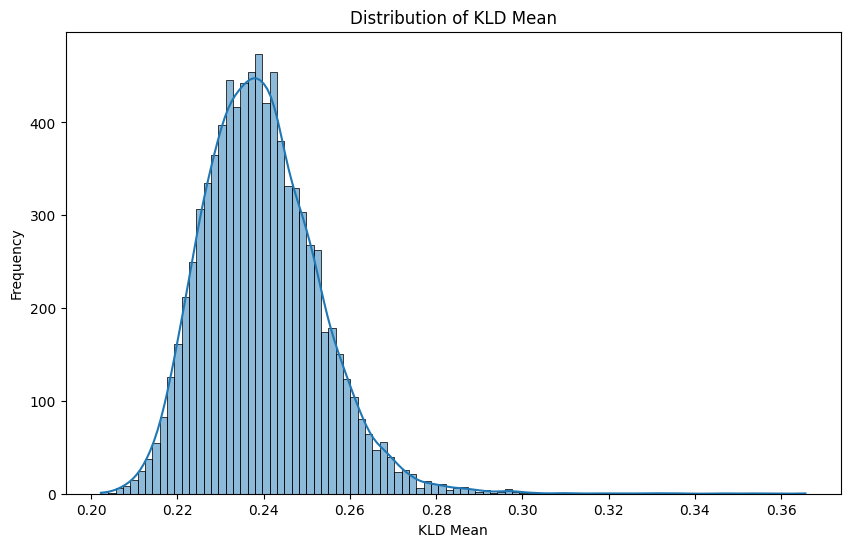

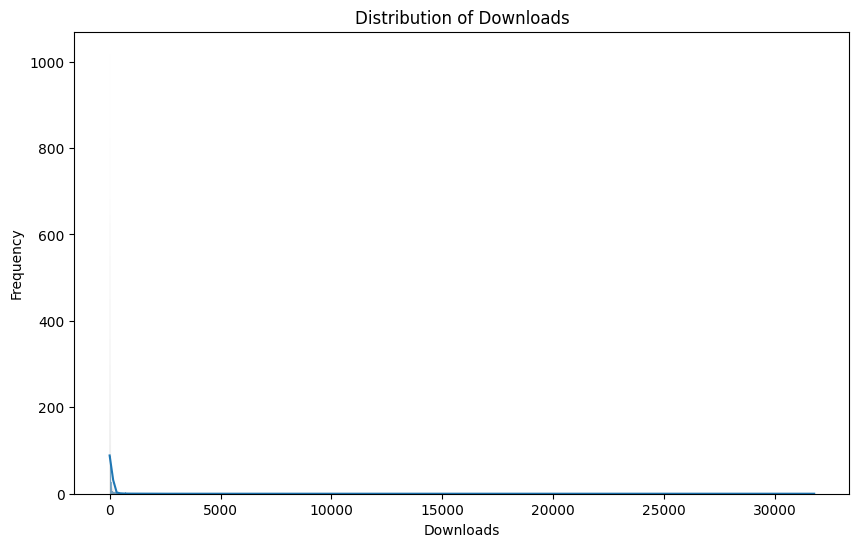

In [9]:
# Merge datasets on the 'id' column
merged_df = pd.merge(metadata, kld_scores_df, left_on='id', right_on='filename')
merged_df = pd.merge(merged_df, extra_controls, on='id')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = merged_df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Inspect data types
print(f"Data types of columns:\n{merged_df.dtypes}")

# Basic statistics
print(f"Summary statistics:\n{merged_df.describe()}")

# Plot distributions of key variables
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of kld_mean
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['kld_mean'], kde=True)
plt.title('Distribution of KLD Mean')
plt.xlabel('KLD Mean')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of downloads
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['downloads'], kde=True)
plt.title('Distribution of Downloads')
plt.xlabel('Downloads')
plt.ylabel('Frequency')
plt.show()


Merged three datasets (metadata, kld_scores, extra_controls) using identifiers ('id' and 'filename').

Ensured data integrity by checking for duplicates (none found) and missing values (none present).

Examined data types and provided summary statistics for numeric columns.
Visualized distributions of key variables (KLD Mean and Downloads).


Index(['id', 'title', 'author', 'authoryearofbirth', 'authoryearofdeath',
       'language', 'downloads', 'subjects', 'type', 'log_downloads',
       'filename', 'kld_mean', 'kld_variance', 'kld_slope', 'kld_median',
       'kld_max', 'kld_min', 'kld_skew', 'kld_kurtosis', 'subj2_war',
       'subj2_adventure', 'subj2_comedy', 'subj2_biography', 'subj2_romance',
       'subj2_drama', 'subj2_fantasy', 'subj2_family', 'subj2_sciencefiction',
       'subj2_action', 'subj2_thriller', 'subj2_western', 'subj2_horror',
       'subj2_mystery', 'subj2_crime', 'subj2_history', 'subj2_periodicals',
       'subj2_others', 'speed', 'sentiment_avg', 'sentiment_vol', 'wordcount'],
      dtype='object')
       authoryearofbirth  authoryearofdeath     downloads  log_downloads  \
count        8549.000000        8549.000000   8549.000000    8549.000000   
mean         1841.691660        1909.182594     72.516435       3.088796   
std           112.325406         113.229210    524.030945       1.126130   

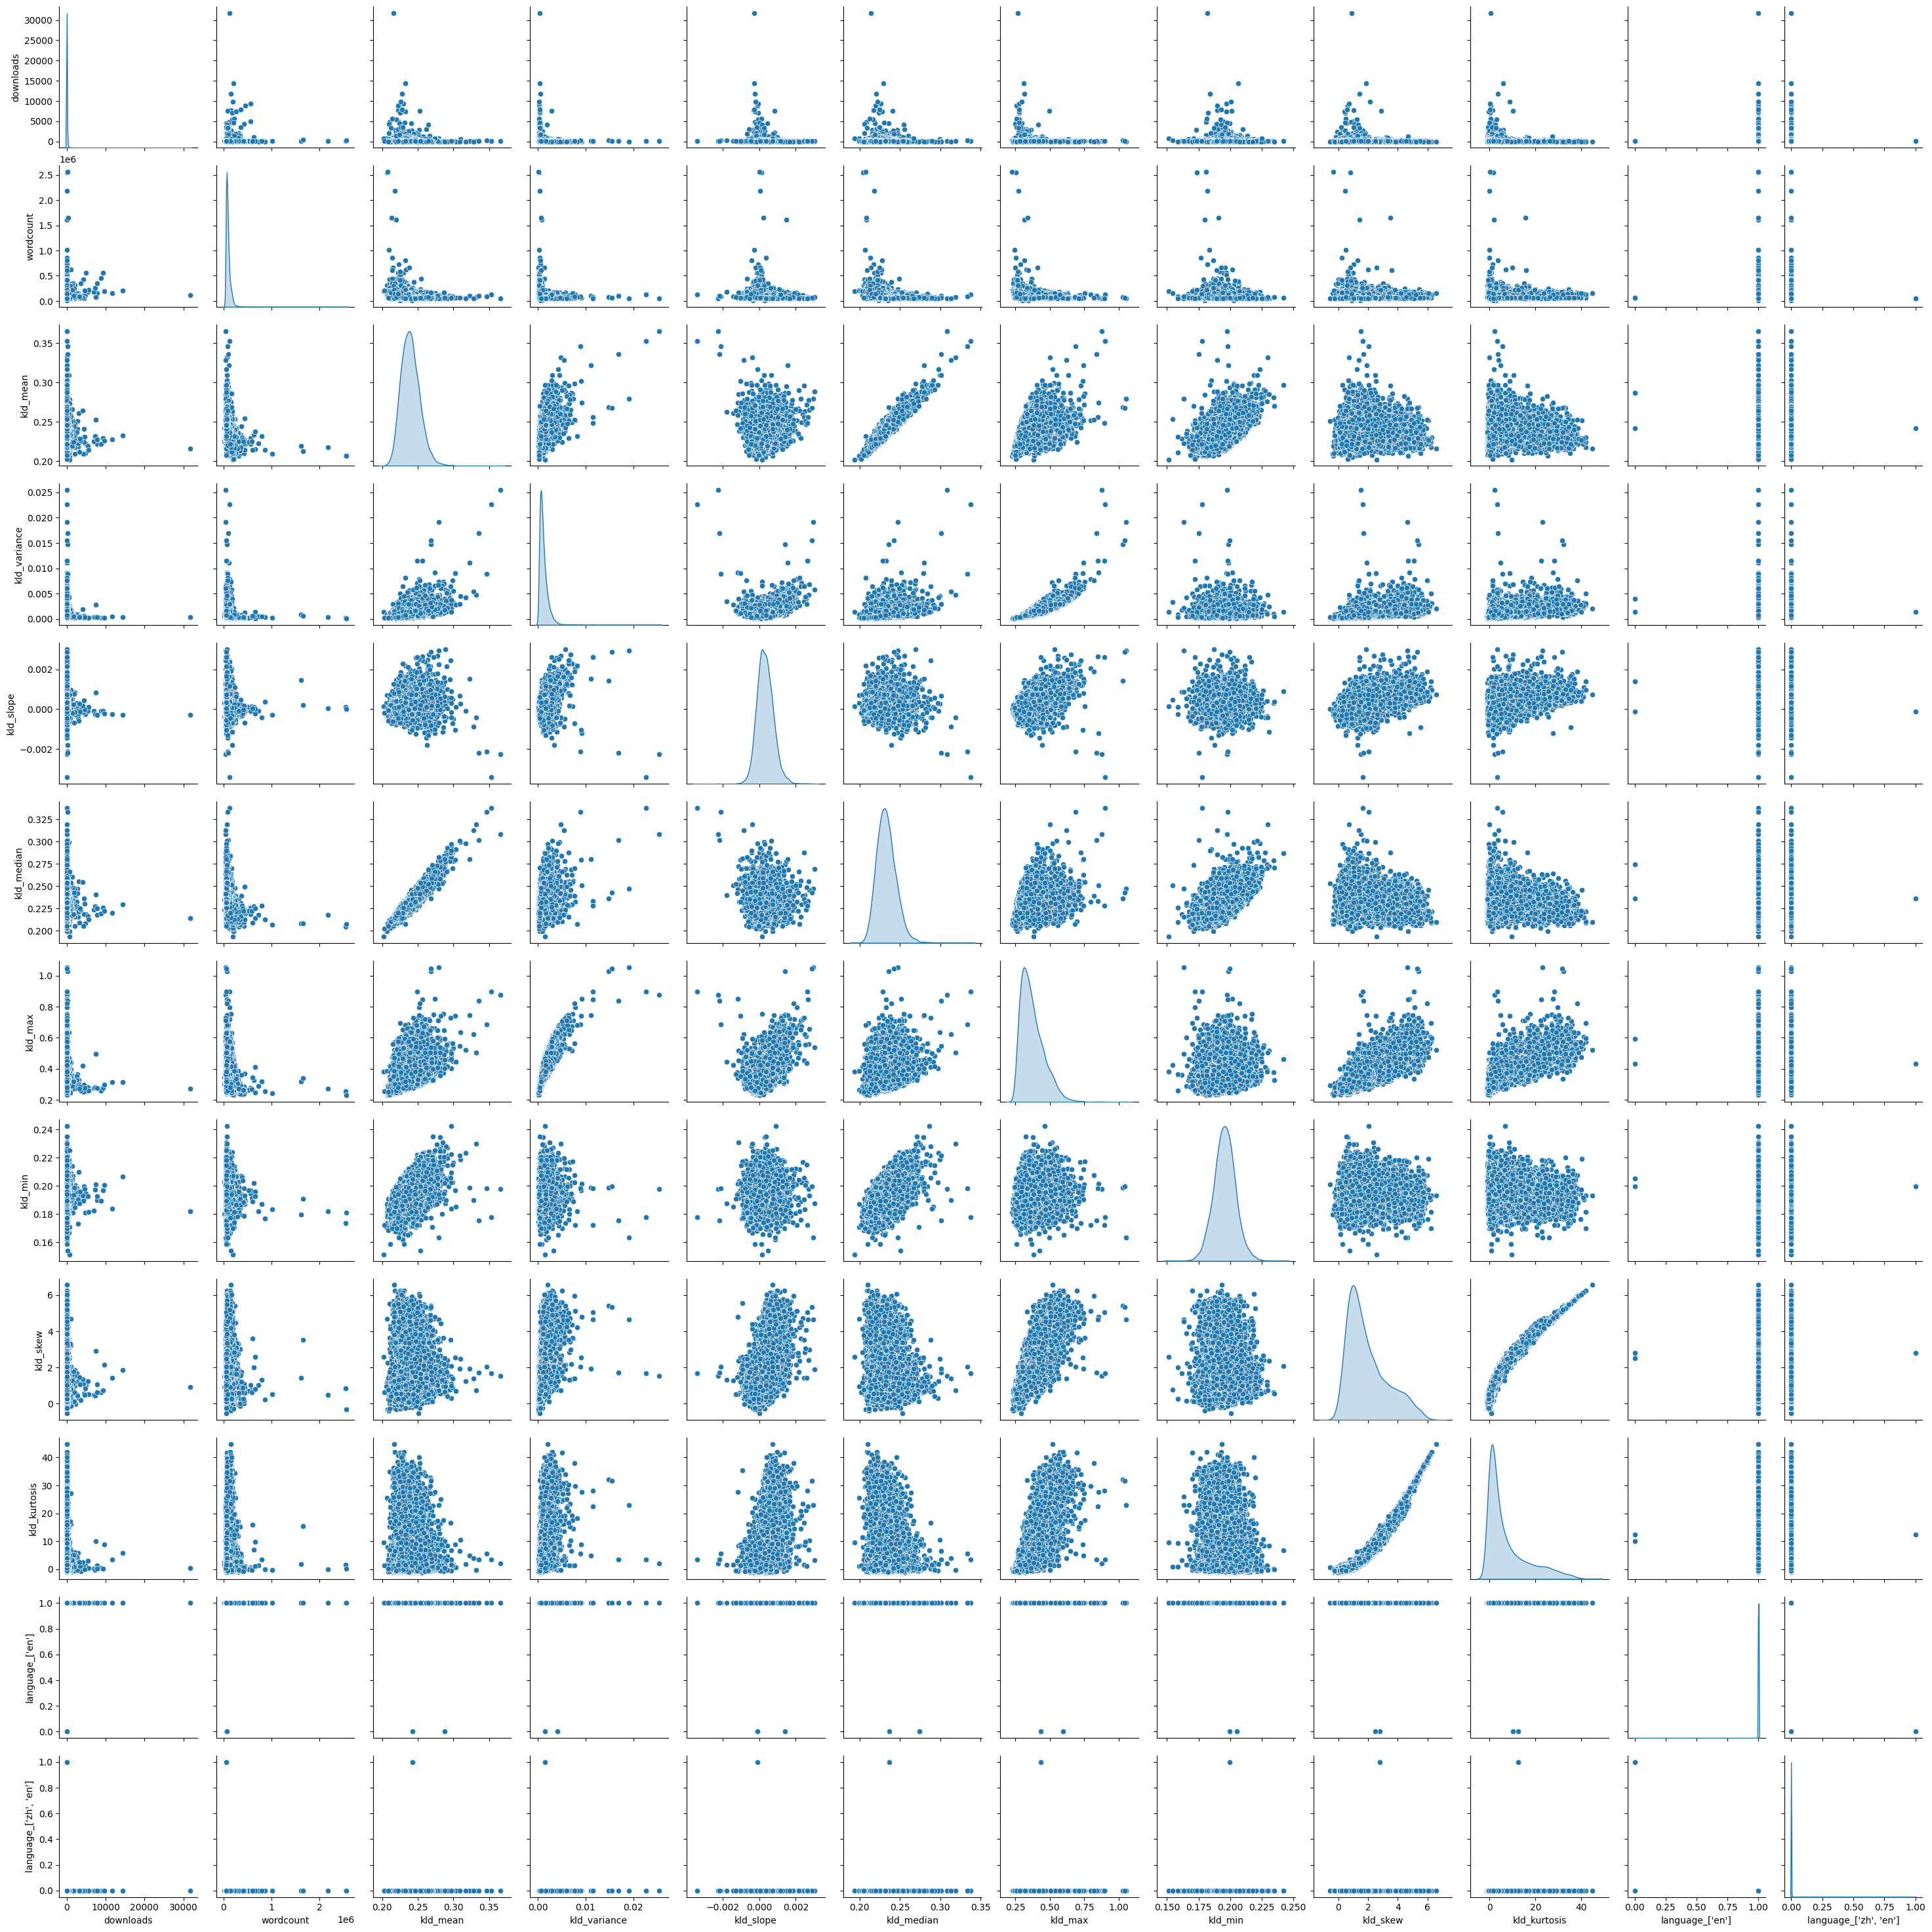

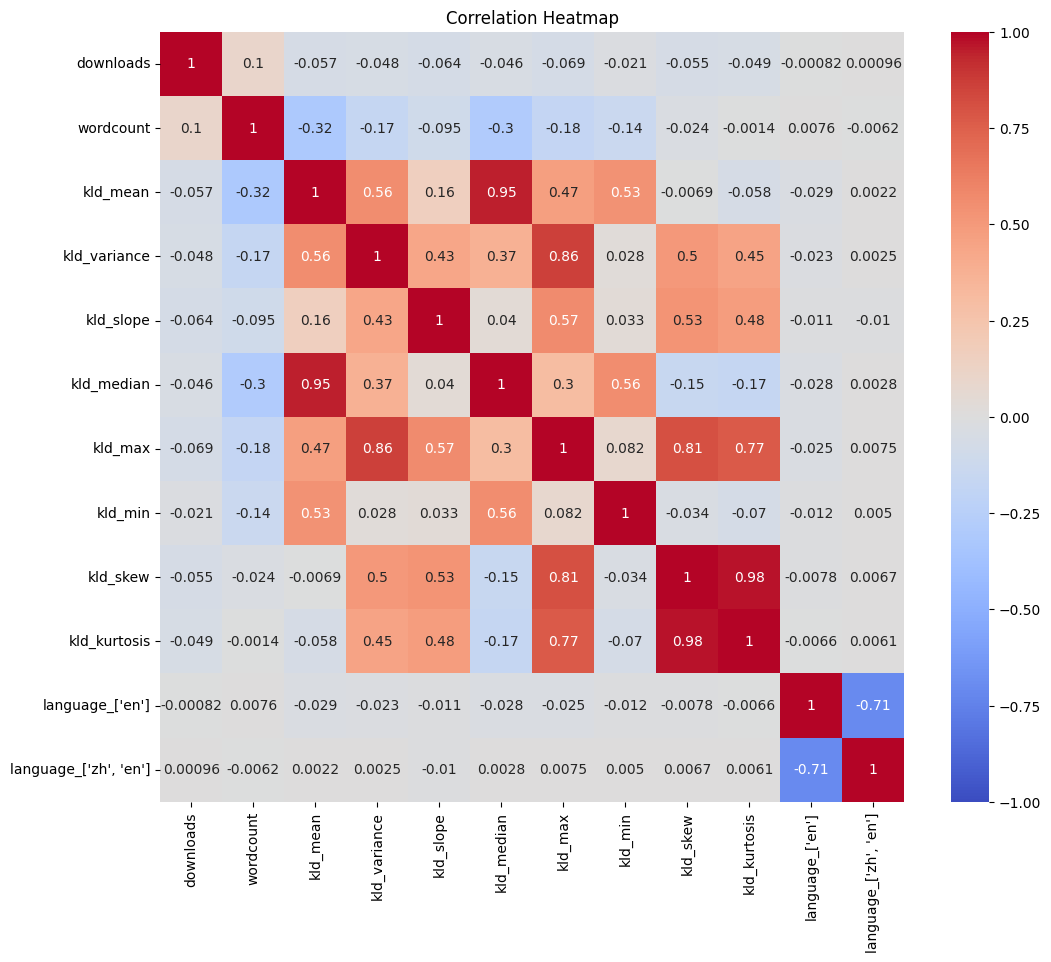

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check current columns to find the correct column name for 'language'
print(merged_df.columns)

# 'language' is part of the columns, proceed with one-hot encoding
if 'language' in merged_df.columns:
    merged_df = pd.get_dummies(merged_df, columns=['language'], drop_first=True)

# Summary statistics
print(merged_df.describe())

# Determine KL divergence columns
kl_columns = [col for col in merged_df.columns if 'kld' in col]

# Pairplot for selected variables including KL divergence columns
sns.pairplot(merged_df[['downloads', 'wordcount'] + kl_columns + [col for col in merged_df.columns if col.startswith('language_')]], diag_kind='kde')
plt.show()

# Correlation heatmap including KL divergence columns
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df[['downloads', 'wordcount'] + kl_columns + [col for col in merged_df.columns if col.startswith('language_')]].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



## Thematic Analysis

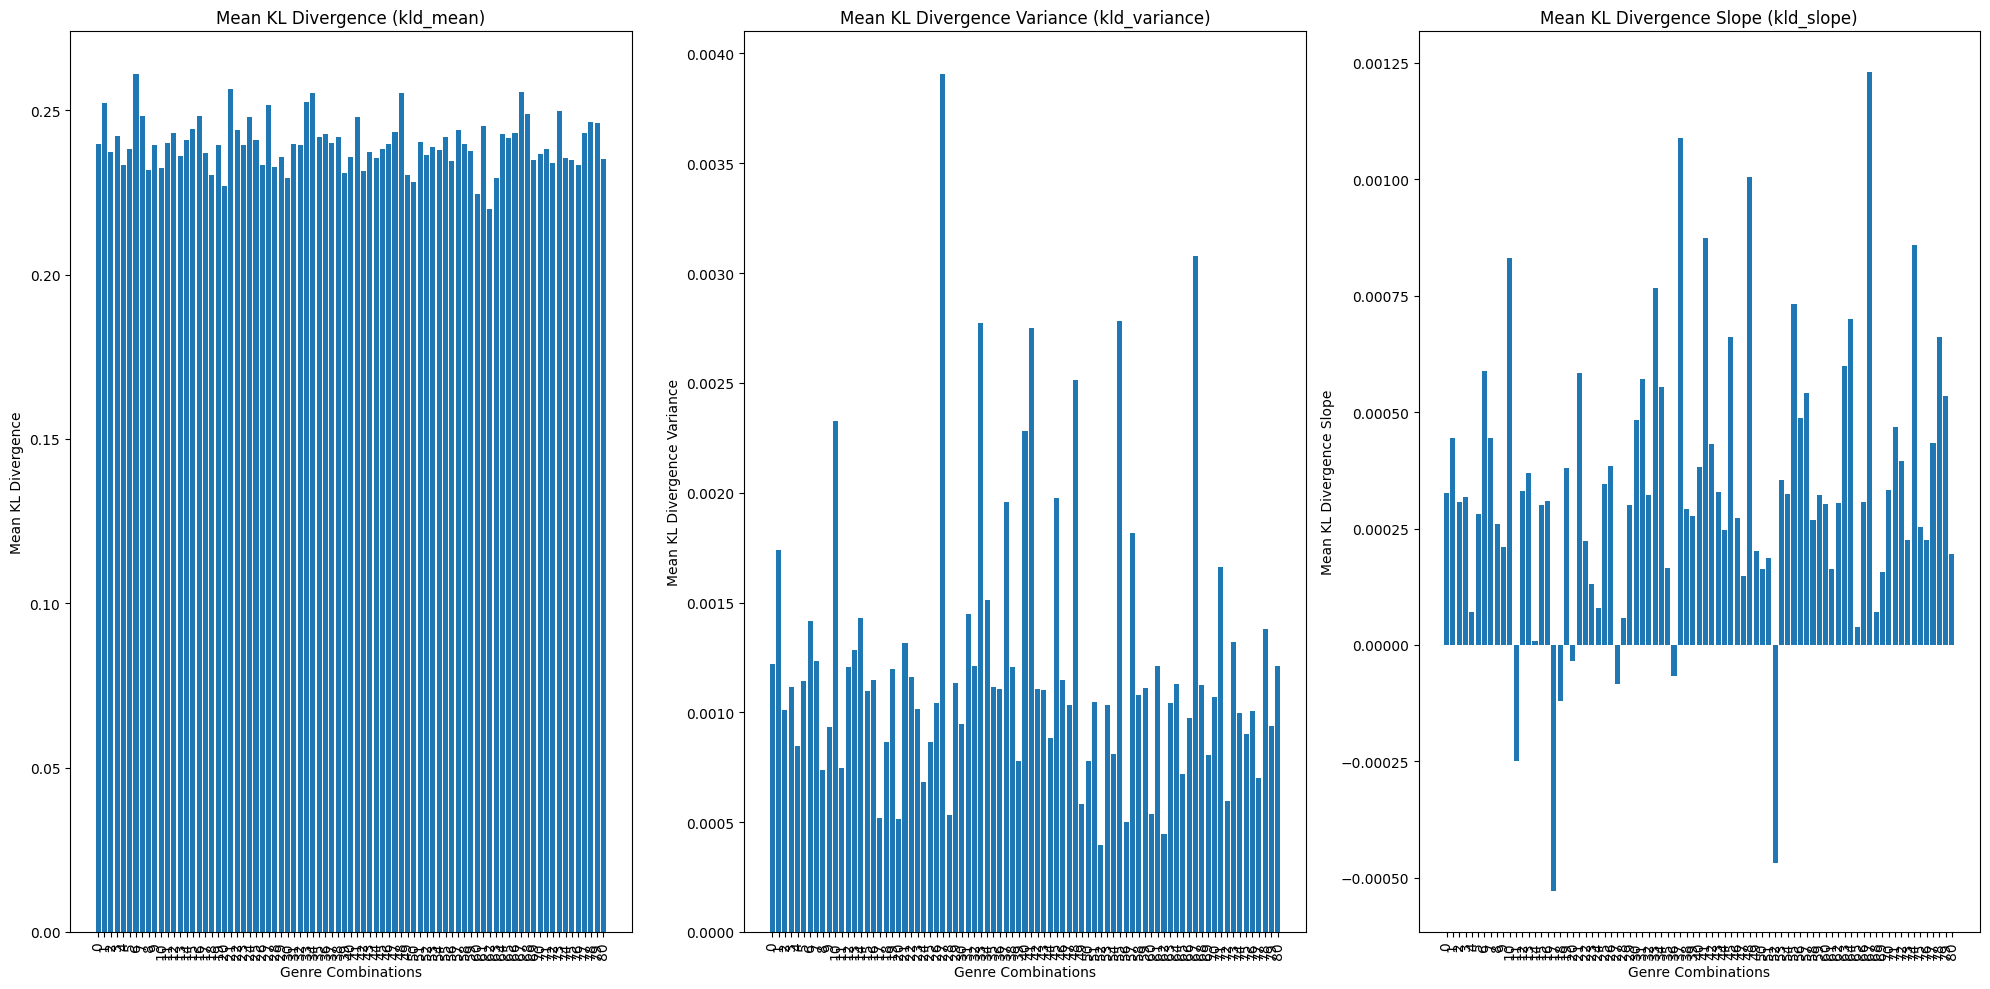

    subj2_war  subj2_adventure  subj2_comedy  subj2_biography  subj2_romance  \
0           0                0             0                0              0   
1           0                0             0                0              0   
2           0                0             0                0              0   
3           0                0             0                0              0   
4           0                0             0                0              0   
..        ...              ...           ...              ...            ...   
76          1                1             0                0              0   
77          1                1             0                0              0   
78          1                1             0                0              1   
79          1                1             0                0              1   
80          1                1             0                0              1   

    subj2_drama  subj2_fantasy  subj2_f

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Thematic Analysis

# Step 1: Grouping Data by Genre
genre_columns = ['subj2_war', 'subj2_adventure', 'subj2_comedy', 'subj2_biography',
                 'subj2_romance', 'subj2_drama', 'subj2_fantasy', 'subj2_family',
                 'subj2_sciencefiction', 'subj2_action', 'subj2_thriller', 'subj2_western',
                 'subj2_horror', 'subj2_mystery', 'subj2_crime', 'subj2_history',
                 'subj2_periodicals', 'subj2_others']

genre_means = merged_df.groupby(genre_columns).agg({
    'kld_mean': 'mean',
    'kld_variance': 'mean',
    'kld_slope': 'mean'
}).reset_index()

# Step 2: Visualize the results
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.bar(range(len(genre_means)), genre_means['kld_mean'], tick_label=range(len(genre_means)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence (kld_mean)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence')

plt.subplot(1, 3, 2)
plt.bar(range(len(genre_means)), genre_means['kld_variance'], tick_label=range(len(genre_means)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence Variance (kld_variance)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence Variance')

plt.subplot(1, 3, 3)
plt.bar(range(len(genre_means)), genre_means['kld_slope'], tick_label=range(len(genre_means)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence Slope (kld_slope)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence Slope')

plt.tight_layout()
plt.show()

print(genre_means)

Thematic analysis focuses on individual instances or themes. Each row represents a different combination of genres.

KL Divergence Variance (kld_variance): This metric measures the variability or spread of the KL divergence values for each genre combination. Higher values indicate greater variability in how different genres interact or diverge in terms of their textual characteristics.

KL Divergence Slope (kld_slope): This metric indicates the rate of change or slope of the KL divergence values. It helps understand how quickly or slowly the divergence between genres changes across different combinations.

## Comparative Analysis


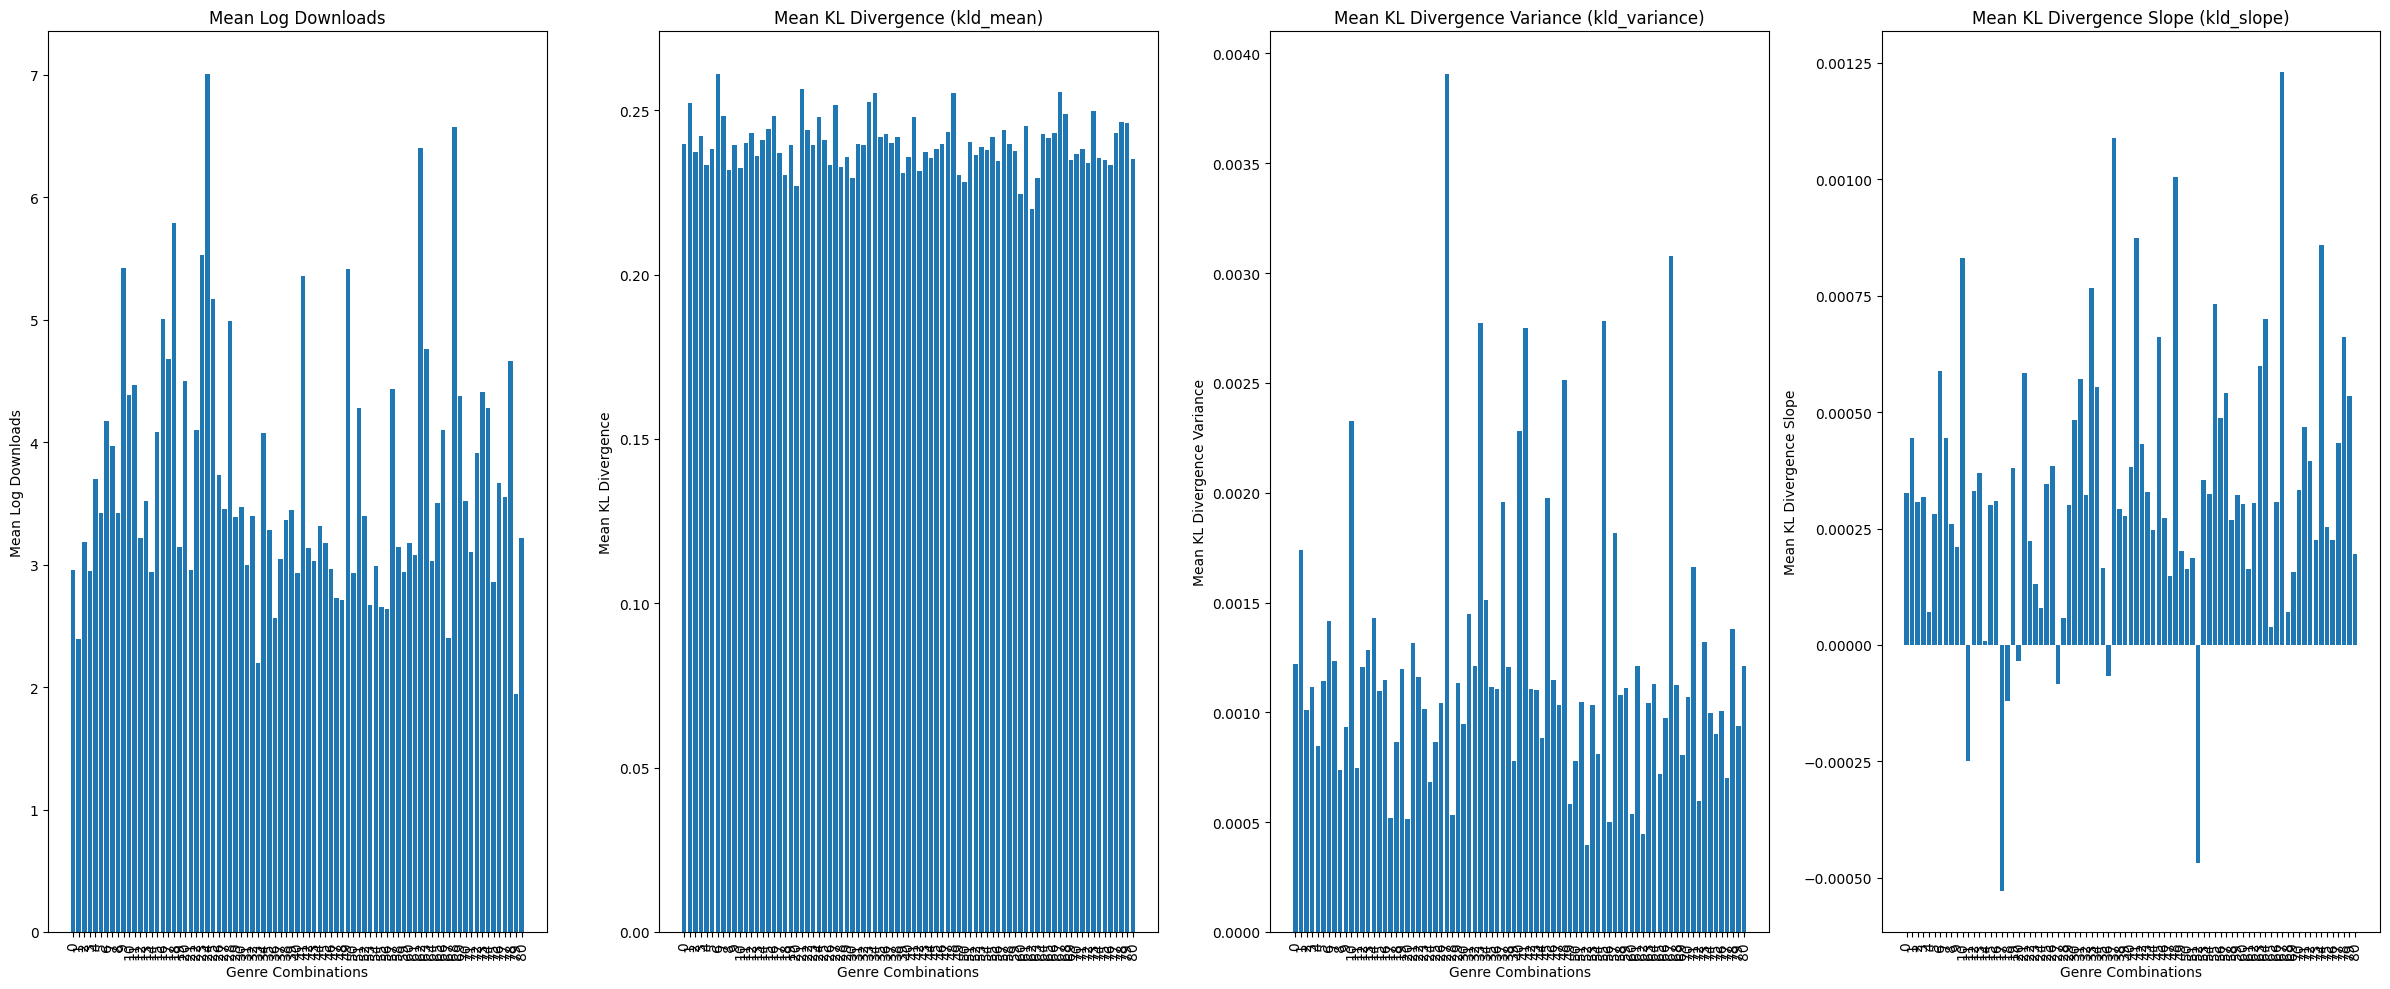

    subj2_war  subj2_adventure  subj2_comedy  subj2_biography  subj2_romance  \
0           0                0             0                0              0   
1           0                0             0                0              0   
2           0                0             0                0              0   
3           0                0             0                0              0   
4           0                0             0                0              0   
..        ...              ...           ...              ...            ...   
76          1                1             0                0              0   
77          1                1             0                0              0   
78          1                1             0                0              1   
79          1                1             0                0              1   
80          1                1             0                0              1   

    subj2_drama  subj2_fantasy  subj2_f

In [12]:
# Comparative Analysis

# Step 1: Calculate Summary Statistics by Genre
genre_summary = merged_df.groupby(genre_columns).agg({
    'log_downloads': 'mean',
    'kld_mean': 'mean',
    'kld_variance': 'mean',
    'kld_slope': 'mean'
}).reset_index()

# Step 2: Visualize the results
plt.figure(figsize=(24, 10))

plt.subplot(1, 4, 1)
plt.bar(range(len(genre_summary)), genre_summary['log_downloads'], tick_label=range(len(genre_summary)))
plt.xticks(rotation=90)
plt.title('Mean Log Downloads')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean Log Downloads')

plt.subplot(1, 4, 2)
plt.bar(range(len(genre_summary)), genre_summary['kld_mean'], tick_label=range(len(genre_summary)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence (kld_mean)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence')

plt.subplot(1, 4, 3)
plt.bar(range(len(genre_summary)), genre_summary['kld_variance'], tick_label=range(len(genre_summary)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence Variance (kld_variance)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence Variance')

plt.subplot(1, 4, 4)
plt.bar(range(len(genre_summary)), genre_summary['kld_slope'], tick_label=range(len(genre_summary)))
plt.xticks(rotation=90)
plt.title('Mean KL Divergence Slope (kld_slope)')
plt.xlabel('Genre Combinations')
plt.ylabel('Mean KL Divergence Slope')

plt.tight_layout()
plt.show()

print(genre_summary)

Comparative analysis involves comparing two or more groups or metrics to discern patterns or differences.

Comparative Analysis of KL Divergence Variance and Slope: By plotting or analyzing both kld_variance and kld_slope together, you can:

Identify Trends: Look for patterns where higher variance (kld_variance) might coincide with steeper slopes (kld_slope), indicating more pronounced differences between genres in those combinations.

Understand Relationships: Evaluate whether certain genre combinations consistently exhibit higher or lower variance and slope, suggesting more stable or dynamic textual differences.



# Linear Regression


#### Linear Regression Analysis Summary

#### Model:
- **Features:** Selected Kullback-Leibler divergence metrics (`kld_mean`, `kld_variance`, etc.), sentiment analysis (`sentiment_avg`, `sentiment_vol`), word count (`wordcount`), and speed.
- **Target:** Transformed `downloads` into `log_downloads` using natural logarithm plus one.
- **Data Split:** Split data into training and testing sets (80-20 split).

#### Results:
- **Model Fit:** Trained a Linear Regression model with standardized features.
- **Coefficients:** Found coefficients and intercept, indicating how each feature affects `log_downloads`.
- **Equation:** Derived regression equation: `log_downloads = 3.09 - 0.10 * kld_mean + 0.19 * kld_variance - ...`.
- **Performance:** Evaluated with Mean Squared Error (MSE = 1.16), R-squared (R² = 0.08), and Mean Absolute Error (MAE = 0.80).
- **Visualization:** Plotted actual vs. predicted `log_downloads`.

#### Insights:
- **Interpretation:** Model explains 8% variance in `log_downloads`.

Coefficients: [-0.09737001  0.18823383 -0.03701459  0.07091177 -0.21460095  0.07562704
 -0.15527296  0.13705057  0.03674988 -0.07935247 -0.20553146  0.1840317 ]
Intercept: 3.086083965776363
Regression Equation: log_downloads = 3.086083965776363 + -0.09737001370318081 * kld_mean + 0.18823383381515388 * kld_variance + -0.03701459484574643 * kld_slope + 0.0709117739109846 * kld_median + -0.21460094939343427 * kld_max + 0.07562703607882536 * kld_min + -0.15527295924916243 * kld_skew + 0.1370505700901561 * kld_kurtosis + 0.03674988158048514 * wordcount + -0.07935247116544397 * speed + -0.20553146239398448 * sentiment_avg + 0.18403170325034104 * sentiment_vol


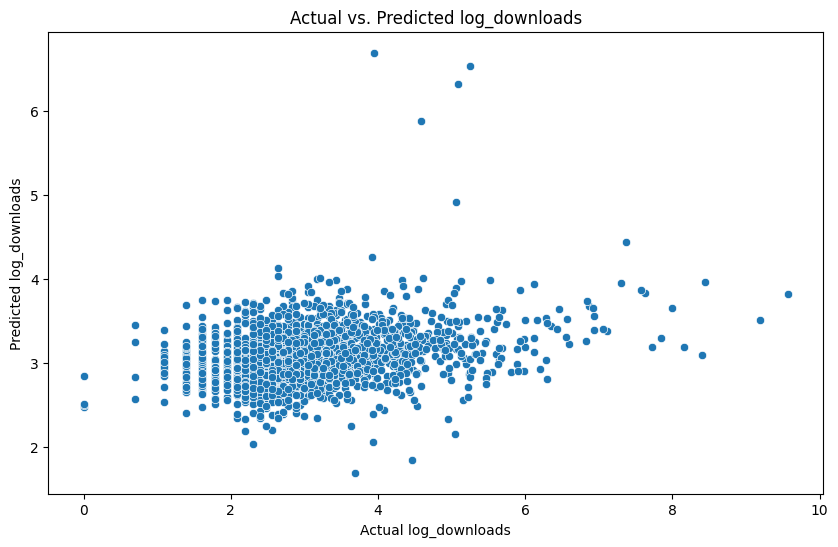

Linear Regression Mean Squared Error: 1.1596073948381325
Linear Regression R-squared: 0.07863344681549589
Linear Regression Mean Absolute Error: 0.8034552008769024


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame containing all necessary data including 'log_downloads'
merged_df['log_downloads'] = np.log1p(merged_df['downloads'])

# Define features and target variable
features = [
    'kld_mean', 'kld_variance', 'kld_slope', 'kld_median',
    'kld_max', 'kld_min', 'kld_skew', 'kld_kurtosis',
    'wordcount', 'speed', 'sentiment_avg', 'sentiment_vol'
]
X = merged_df[features]
y = merged_df['log_downloads']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Print the regression equation
print(f"Regression Equation: log_downloads = {model.intercept_} + " +
      " + ".join([f"{coef} * {feature}" for coef, feature in zip(model.coef_, features)]))

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Plot actual vs predicted log_downloads
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual log_downloads')
plt.ylabel('Predicted log_downloads')
plt.title('Actual vs. Predicted log_downloads')
plt.show()

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")
print(f"Linear Regression Mean Absolute Error: {mae}")


In [15]:
import pandas as pd

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coef_df)

          Feature  Coefficient
0        kld_mean    -0.097370
1    kld_variance     0.188234
2       kld_slope    -0.037015
3      kld_median     0.070912
4         kld_max    -0.214601
5         kld_min     0.075627
6        kld_skew    -0.155273
7    kld_kurtosis     0.137051
8       wordcount     0.036750
9           speed    -0.079352
10  sentiment_avg    -0.205531
11  sentiment_vol     0.184032


# Genre-Specific Analysis

## LASSO Regression and Genre-Specific Effects

### Identifying Predictive Variables
We employed LASSO regression to determine the most predictive variables for book popularity. LASSO helps in variable selection by imposing a penalty that shrinks less important coefficients to zero.

### Investigating Genre-Specific Effects
We analyzed how the impact of KLD measures on book popularity varies across different genres. This analysis helps to understand the heterogeneity of effects and identifies which genres are most influenced by information revelation.


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame containing all necessary data
merged_df['log_downloads'] = np.log1p(merged_df['downloads'])

# Define the list of genre columns
genre_columns = [
    'subj2_war', 'subj2_adventure', 'subj2_comedy', 'subj2_biography',
    'subj2_romance', 'subj2_drama', 'subj2_fantasy', 'subj2_family',
    'subj2_sciencefiction', 'subj2_action', 'subj2_thriller', 'subj2_western',
    'subj2_horror', 'subj2_mystery', 'subj2_crime', 'subj2_history',
    'subj2_periodicals', 'subj2_others'
]

# Define hyperparameter grid for Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [10000]}

# Dictionary to store the results
genre_results = {}

# Loop through each genre and perform the analysis
for genre in genre_columns:
    genre_data = merged_df[merged_df[genre] == 1]

    if len(genre_data) < 5:
        print(f"Skipping genre {genre} due to insufficient samples ({len(genre_data)} samples).")
        continue

    X_genre = genre_data[['kld_mean', 'kld_variance', 'kld_slope', 'kld_median', 'kld_max', 'kld_min', 'kld_skew', 'kld_kurtosis', 'speed', 'sentiment_avg', 'sentiment_vol', 'wordcount']]
    y_genre = genre_data['log_downloads']

    # Scale the features
    scaler = StandardScaler()
    X_genre_scaled = scaler.fit_transform(X_genre)

    # Split data into training and testing sets
    X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre_scaled, y_genre, test_size=0.2, random_state=42)

    # Initialize and fit the Lasso model with GridSearchCV
    lasso_genre = Lasso(random_state=42)
    grid_search = GridSearchCV(lasso_genre, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_genre, y_train_genre)

    # Best parameters
    best_params = grid_search.best_params_
    print(f"Genre: {genre}, Best Params: {best_params}")

    # Predict on test set
    y_pred_genre = grid_search.predict(X_test_genre)

    # Evaluate model performance
    mse_genre = mean_squared_error(y_test_genre, y_pred_genre)
    mae_genre = mean_absolute_error(y_test_genre, y_pred_genre)
    r2_genre = r2_score(y_test_genre, y_pred_genre)
    print(f"Genre: {genre}, Mean Squared Error: {mse_genre}")
    print(f"Genre: {genre}, Mean Absolute Error: {mae_genre}")
    print(f"Genre: {genre}, R-squared: {r2_genre}")

    # Store results
    genre_results[genre] = {
        'Best Params': best_params,
        'MSE': mse_genre,
        'MAE': mae_genre,
        'R²': r2_genre
    }

# Print the complete results for each genre
print("\nGenre-specific Results:")
for genre, results in genre_results.items():
    print(f"Genre: {genre}")
    for metric, value in results.items():
        print(f"  {metric}: {value}")

# Additional evaluation metrics for the overall model
# Define features and target variable for overall analysis
features = ['kld_mean', 'kld_variance', 'kld_slope', 'kld_median', 'kld_max', 'kld_min', 'kld_skew', 'kld_kurtosis', 'speed', 'sentiment_avg', 'sentiment_vol', 'wordcount']
X = merged_df[features]
y = merged_df['log_downloads']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate overall model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nOverall Model Results:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Genre: subj2_war, Best Params: {'alpha': 0.001, 'max_iter': 10000}
Genre: subj2_war, Mean Squared Error: 1.163522658557791
Genre: subj2_war, Mean Absolute Error: 0.851430701701023
Genre: subj2_war, R-squared: 0.026833772851338034
Genre: subj2_adventure, Best Params: {'alpha': 0.01, 'max_iter': 10000}
Genre: subj2_adventure, Mean Squared Error: 0.9547249314986235
Genre: subj2_adventure, Mean Absolute Error: 0.7254517020940042
Genre: subj2_adventure, R-squared: 0.17589052358477353
Skipping genre subj2_comedy due to insufficient samples (0 samples).
Genre: subj2_biography, Best Params: {'alpha': 1, 'max_iter': 10000}
Genre: subj2_biography, Mean Squared Error: 1.0411838846186627
Genre: subj2_biography, Mean Absolute Error: 0.8740013296759068
Genre: subj2_biography, R-squared: -0.4511607546234693
Genre: subj2_romance, Best Params: {'alpha': 0.01, 'max_iter': 10000}
Genre: subj2_romance, Mean Squared Error: 1.7860417512319082
Genre: subj2_romance, Mean Absolute Error: 0.9320364180326164
Gen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e-03, tolerance: 1.410e-03
  model = cd_fast.enet_coordinate_descent(


Genre: subj2_crime, Best Params: {'alpha': 0.1, 'max_iter': 10000}
Genre: subj2_crime, Mean Squared Error: 0.27219726266467603
Genre: subj2_crime, Mean Absolute Error: 0.4567005437249212
Genre: subj2_crime, R-squared: -0.42201502572739136
Genre: subj2_history, Best Params: {'alpha': 1, 'max_iter': 10000}
Genre: subj2_history, Mean Squared Error: 1.1455700237855357
Genre: subj2_history, Mean Absolute Error: 0.7957520438162147
Genre: subj2_history, R-squared: -0.0003589549595479635
Genre: subj2_periodicals, Best Params: {'alpha': 0.01, 'max_iter': 10000}
Genre: subj2_periodicals, Mean Squared Error: 0.8713633070969771
Genre: subj2_periodicals, Mean Absolute Error: 0.6939337093038993
Genre: subj2_periodicals, R-squared: 0.40545093256626386
Genre: subj2_others, Best Params: {'alpha': 0.001, 'max_iter': 10000}
Genre: subj2_others, Mean Squared Error: 1.0108090262327578
Genre: subj2_others, Mean Absolute Error: 0.7405673415155662
Genre: subj2_others, R-squared: 0.09779400121356019

Genre-spe

Here's a summary of what each metric indicates:

1. **Best Parameters (`Best Params`)**: These are the hyperparameters (`alpha` and `max_iter`) that yielded the best performance during the GridSearchCV process for each genre. `Alpha` controls the regularization strength, and `max_iter` specifies the maximum number of iterations for the optimization.

2. **Mean Squared Error (`MSE`)**: This measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance in terms of predicting the target variable (log downloads in your case).

3. **Mean Absolute Error (`MAE`)**: This measures the average absolute difference between the predicted values and the actual values. It gives you an idea of how close the predictions are to the actual values on average.

4. **R-squared (`R²`)**: Also known as the coefficient of determination, R-squared indicates the proportion of the variance in the dependent variable (log downloads) that is predictable from the independent variables (features) in the model. Higher values of R-squared indicate a better fit of the model to the data.

- **Genre-Specific Insights**:
  - **Adventure** and **Periodicals** genres tend to have lower prediction errors and higher explanatory power (R-squared).
  - **Drama**, **Fantasy**, and **Biography** genres show higher prediction errors and poorer model fit.
  
- **Overall Model Performance**:
  - The model explains a modest amount of variance in book popularity (R-squared = 0.08), suggesting room for improvement.
  
- **Optimal Parameters**:
  - Regularization parameter (alpha) values vary by genre, indicating different levels of regularization needed for effective model performance across genres.

### LASSO Regression:
- **Model Performance Metrics:**
  - Mean Squared Error (MSE): 1.2108
  - R-squared (R2): 0.0380
  - Mean Absolute Error (MAE): 0.8132
  
- **Feature Coefficients:**
  - `kld_skew`, `kld_min`, and `kld_max` have non-zero coefficients, indicating they significantly influence the prediction.

### OLS Regression:
- **Model Summary:**
  - **R-squared (R2)**: 0.085
  - **Adjusted R-squared (Adj. R2)**: 0.084
  - **F-statistic**: 53.02, with a very low probability (Prob (F-statistic) = 1.47e-122), indicating the model fits the data well overall.
  
- **Significant Predictors (based on p-values):**
  - `kld_variance`, `kld_slope`, `kld_min`, `speed`, `sentiment_avg`, and `sentiment_vol` show significant influence on `log_downloads`.
  
- **Considerations:**
  - Multicollinearity might be an issue (high condition number), suggesting some predictors may be highly correlated.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso

# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Evaluate model performance on test set
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"LASSO Regression Mean Squared Error: {mse}")
print(f"LASSO Regression R-squared: {r2}")
print(f"LASSO Regression Mean Absolute Error: {mae}")


LASSO Regression Mean Squared Error: 1.210759506098376
LASSO Regression R-squared: 0.03799051486304861
LASSO Regression Mean Absolute Error: 0.8131716786030817


In [18]:
import pandas as pd

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})

print(coef_df)


          Feature  Coefficient
0        kld_mean    -0.000000
1    kld_variance    -0.000000
2       kld_slope    -0.000000
3      kld_median    -0.000000
4         kld_max    -0.000000
5         kld_min     0.000000
6        kld_skew    -0.088531
7    kld_kurtosis     0.000000
8           speed    -0.000000
9   sentiment_avg    -0.000000
10  sentiment_vol     0.000000
11      wordcount     0.000003


In [19]:
import statsmodels.api as sm

# Add constant to X_train if needed for statsmodels
X_train_const = sm.add_constant(X_train)

# Fit OLS model for summary with statsmodels
stats_model = sm.OLS(y_train, X_train_const)
stats_results = stats_model.fit()

# Print summary with coefficients, standard errors, and p-values
print(stats_results.summary())


                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     53.02
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.47e-122
Time:                        04:35:32   Log-Likelihood:                -10218.
No. Observations:                6839   AIC:                         2.046e+04
Df Residuals:                    6826   BIC:                         2.055e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8680      0.364     10.631